In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

In [2]:
# Load and preprocess the Fashion MNIST dataset
(x_train, ), (x_test, y_test) = fashion_mnist.load_data()

In [15]:
x_train.shape

(60000, 28, 28, 1)

In [16]:
y_train.shape

(60000, 10)

In [17]:
x_test.shape

(10000, 28, 28, 1)

In [18]:
y_test.shape

(10000, 10)

In [3]:
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255

In [4]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [5]:
# Define the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

C:\Users\PASSNOWNOW\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.6956 - loss: 0.8353 - val_accuracy: 0.8552 - val_loss: 0.3953
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.8642 - loss: 0.3715 - val_accuracy: 0.8652 - val_loss: 0.3568
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.8870 - loss: 0.3125 - val_accuracy: 0.8911 - val_loss: 0.2997
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.8993 - loss: 0.2764 - val_accuracy: 0.8901 - val_loss: 0.2988
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9061 - loss: 0.2599 - val_accuracy: 0.9010 - val_loss: 0.2734
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9143 - loss: 0.2311 - val_accuracy: 0.9046 - val_loss: 0.2633
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.9224 - loss: 0.2140 - val_accuracy: 0.9057 - val_loss: 0.2668
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9296 - loss: 0.1932 - 

In [8]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9071 - loss: 0.2783
Test accuracy: 0.9060999751091003


In [9]:
# Make predictions on two images
predictions = model.predict(x_test[:2])
predicted_classes = np.argmax(predictions, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


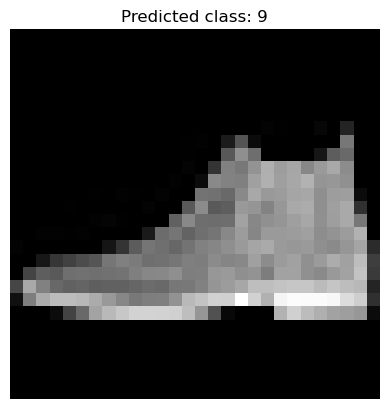

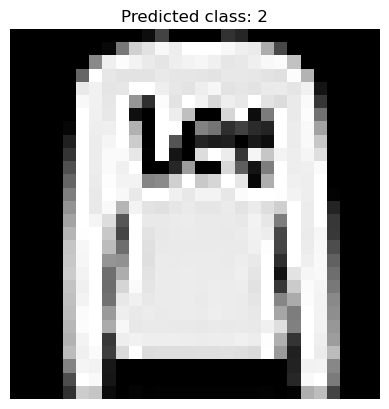

In [10]:
# Display the predictions
for i in range(2):
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'Predicted class: {predicted_classes[i]}')
    plt.axis('off')
    plt.show()